https://finance.yahoo.com/calendar/earnings/?day=2023-12-11
Options data for CASY:
Average IV for Calls: 0.10658671648629996
Average IV for Puts: 0.09621815949401856
Total Call Volume: 390.0
Total Call open interest: 24
Total Call engagement: 414.0
Total Put Volume: 243.0
Total Put open interest: 46
Total Put engagement: 289.0
Number of ITM Call Options: 12
Number of ITM Put Options: 21


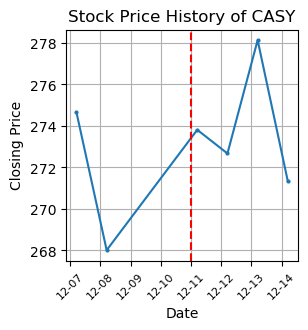

Options data for ORCL:
Average IV for Calls: 0.14027872241908027
Average IV for Puts: 0.07514873412756654
Total Call Volume: 147497.0
Total Call open interest: 1474
Total Call engagement: 148971.0
Total Put Volume: 32976.0
Total Put open interest: 20264.0
Total Put engagement: 53240.0
Number of ITM Call Options: 214
Number of ITM Put Options: 214


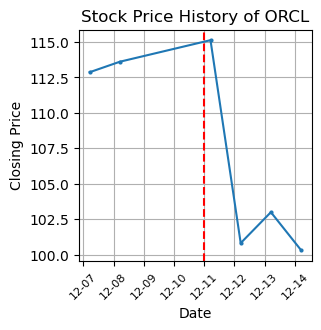

Options data for BLBD:
Average IV for Calls: 0.053907572998046875
Average IV for Puts: nan
Total Call Volume: 212.0
Total Call open interest: 3
Total Call engagement: 215.0
Total Put Volume: 105.0
Total Put open interest: 0.0
Total Put engagement: 105.0
Number of ITM Call Options: 11
Number of ITM Put Options: 4


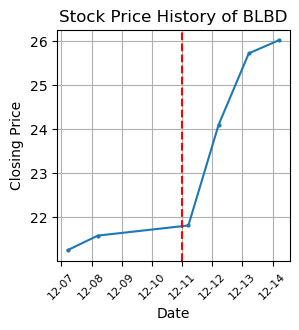

Options data for UEC:
Average IV for Calls: 0.10565498699019621
Average IV for Puts: 0.2550643929769716
Total Call Volume: 3914.0
Total Call open interest: 21
Total Call engagement: 3935.0
Total Put Volume: 1524.0
Total Put open interest: 1655
Total Put engagement: 3179.0
Number of ITM Call Options: 69
Number of ITM Put Options: 31


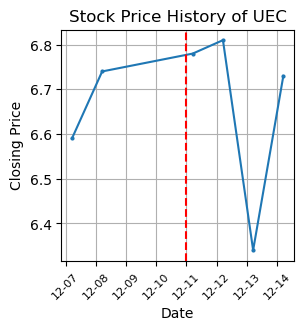

Options data for SRL:
Average IV for Calls: 0.6091361682128905
Average IV for Puts: nan
Total Call Volume: 5.0
Total Call open interest: 786
Total Call engagement: 791.0
Total Put Volume: 1.0
Total Put open interest: 2.0
Total Put engagement: 3.0
Number of ITM Call Options: 3
Number of ITM Put Options: 0


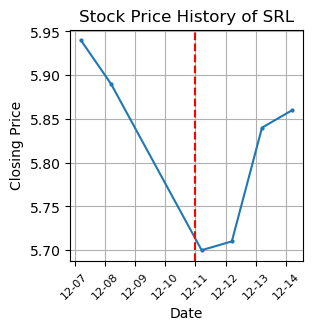

Options data for NOTV:
Average IV for Calls: 0.5557363398437499
Average IV for Puts: 0.062509375
Total Call Volume: 249.0
Total Call open interest: 383
Total Call engagement: 632.0
Total Put Volume: 90.0
Total Put open interest: 0
Total Put engagement: 90.0
Number of ITM Call Options: 3
Number of ITM Put Options: 5


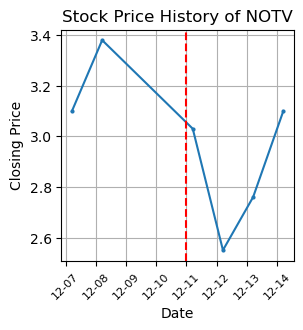

Options data for QD:
Average IV for Calls: 0.869913392505787
Average IV for Puts: 0.5720560348307292
Total Call Volume: 733
Total Call open interest: 3845
Total Call engagement: 4578
Total Put Volume: 58.0
Total Put open interest: 229
Total Put engagement: 287.0
Number of ITM Call Options: 8
Number of ITM Put Options: 9


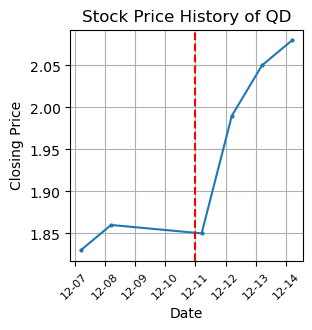

In [2]:
from datetime import datetime, timedelta
from utils import *  

# Call the function and store the result
day = '2023-12-11'
ticker_data_sorted = scrape_and_process_yahoo_finance_data(day)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date + timedelta(days=4)
start_date = release_date - timedelta(days=4)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get Reality
    reality = analyze_stock_performance_post_earnings(ticker, release_date, start_date, end_date)

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date, release_date=release_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
